# Question 1: ANN (1.0 điểm)
- Use MELBOURNE_HOUSE_PRICE dataset (MELBOURNE_HOUSE_PRICES_LESS.csv) to precdict house prices from other features.
- Read more: https://www.kaggle.com/anthonypino/melbourne-housing-market/data
### Requirement:
- Apply ANN to build a model that predicts house prices from the provided features.
- Make new predictions for samples that have no prices in the dataset.

### **About Dataset**
*This data was scraped from publicly available results posted every week from Domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.*

Some Key Details
- Suburb: Suburb

- Address: Address

- Rooms: Number of rooms

- Price: Price in Australian dollars

- Method:
        S - property sold;
        SP - property sold prior;
        PI - property passed in;
        PN - sold prior not disclosed;
        SN - sold not disclosed;
        NB - no bid;
        VB - vendor bid;
        W - withdrawn prior to auction;
        SA - sold after auction;
        SS - sold after auction price not disclosed.
        N/A - price or highest bid not available.

- Type:
        br - bedroom(s);
        h - house,cottage,villa, semi,terrace;
        u - unit, duplex;
        t - townhouse;
        dev site - development site;
        o res - other residential.

- SellerG: Real Estate Agent

- Date: Date sold

- Distance: Distance from CBD in Kilometres

- Regionname: General Region (West, North West, North, North east …etc)

- Propertycount: Number of properties that exist in the suburb.

- Bedroom2 : Scraped # of Bedrooms (from different source)

- Bathroom: Number of Bathrooms

- Car: Number of carspots

- Landsize: Land Size in Metres

- BuildingArea: Building Size in Metres

- YearBuilt: Year the house was built

- CouncilArea: Governing council for the area


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import iqr
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats import iqr
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from pandas_profiling import ProfileReport
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor as rf_reg
from sklearn.model_selection import RandomizedSearchCV as randomCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn import feature_selection
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.compose import make_column_transformer, make_column_selector

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung


In [5]:
print(tf.__version__)
print(keras.__version__)

2.8.2
2.8.0


In [6]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17928437661805759361
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16154099712
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4548408350020138870
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
xla_global_id: 416903419
]


### **Exploratory Data Analysis (EDA)**

In [7]:
df = pd.read_csv('data/MELBOURNE_HOUSE_PRICES_LESS.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [8]:
df.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


'''
Quan sát kết quả, ta thấy dataset ban đầu có 48433 giá trị price trên tổng 63023 records (14590 giá trị null) 
=> ko sử dụng các records có Price null vì Price là target, nếu các records không có Price thì không cần sử dụng
=> dùng các records có Price null cho các predictions 
'''

In [10]:
df_new = df[~df.Price.isnull()].reset_index(drop=True)
df_prediction = df[df.Price.isnull()].reset_index(drop=True)

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48433 entries, 0 to 48432
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         48433 non-null  object 
 1   Address        48433 non-null  object 
 2   Rooms          48433 non-null  int64  
 3   Type           48433 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         48433 non-null  object 
 6   SellerG        48433 non-null  object 
 7   Date           48433 non-null  object 
 8   Postcode       48433 non-null  int64  
 9   Regionname     48433 non-null  object 
 10  Propertycount  48433 non-null  int64  
 11  Distance       48433 non-null  float64
 12  CouncilArea    48433 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 4.8+ MB


In [12]:
numbers = [i for i in df_new.columns if df_new.dtypes[i] != "object"]
objects = [i for i in df_new.columns if df_new.dtypes[i] == "object"]

In [13]:
### xét các biến có dtype là object
i = 0
for obj in objects:
    print(
        i,
        "/",
        obj,
        "\t len =",
        len(df[obj].unique()),
        df[obj].unique() if len(df[obj].unique()) < 20 else "",
    )
    i = i + 1


0 / Suburb 	 len = 380 
1 / Address 	 len = 57754 
2 / Type 	 len = 3 ['h' 't' 'u']
3 / Method 	 len = 9 ['S' 'SP' 'PI' 'SN' 'VB' 'PN' 'SA' 'W' 'SS']
4 / SellerG 	 len = 476 
5 / Date 	 len = 112 
6 / Regionname 	 len = 8 ['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'South-Eastern Metropolitan' 'Eastern Metropolitan' 'Northern Victoria'
 'Western Victoria' 'Eastern Victoria']
7 / CouncilArea 	 len = 34 


In [14]:
### xét các biến có dtype != object
i = 0
for obj in numbers:
    print(
        i,
        "/",
        obj,
        "\t len =",
        len(df[obj].unique()),
        df[obj].unique() if len(df[obj].unique()) < 20 else "",
    )
    i = i + 1

0 / Rooms 	 len = 14 [ 3  2  6  4  1  5  7  8 11 10 12  9 31 16]
1 / Price 	 len = 3418 
2 / Postcode 	 len = 225 
3 / Propertycount 	 len = 368 
4 / Distance 	 len = 180 


'''
Xác định thuộc tính:
- input (predict): <> price: tất cả thuộc tính của df trừ price
- output (target): price

continuous variable: Price, Propertycount, Distance
categorical variable: Rooms, Postcode, Suburb, Type, Method, Regionname, SellerG, CouncilArea
identifier variable: Address
datetime variabl: Date

'''

'''
Dù sử dụng ANN để build model, nghĩa là có thể sử dụng hết tất cả các thuộc tính của dataset. 
Tuy nhiên ta vẫn thử phân tích các biến xem mối quan hệ của chúng với Price như thế nào (chỉ để tham khảo).
Ngoài ra, features: Date, SellerG, Postcode, Suburb không có ý nghĩa cho việc build model, ta sẽ không dùng feature này
'''

In [15]:
df_new = df_new.drop(columns={'Date', 'SellerG', 'Postcode', 'Suburb', 'Address'})

In [16]:
df_new.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Regionname', 'Propertycount',
       'Distance', 'CouncilArea'],
      dtype='object')

### **Phân tích các biến**

### **Continuous Variable**

In [17]:
def continuous_univariate_analysis(f):
    print("1\ Describe: \n", f.describe(), "\n")
    print("2\ Meadian: ", f.median())
    print("3\ Mode: ", f.mode)
    print("4\ Range: ", f.values.ptp())
    print("5\ Variance: ", f.var())
    print("6\ Số NaN: ", f.isnull().sum())
    print("7\ \tQ1 = ", np.quantile(f, 0.25))
    print("   \tQ3 = ", np.quantile(f, 0.75))
    print("   \tIQR = ", iqr(f))

    print("8\ Skew: ", f.skew())
    if f.skew() > 0:
        print("Phân phối lệch phải")
    elif f.skew() == 0:
        print("Phân phối đối xứng")
    else:
        print("Phân phối lệch trái")

    print("9\ Kurtosis: ", f.kurtosis())
    if f.kurtosis() > 0:
        print("Phân phối nhọn hơn pp chuẩn")
    elif f.kurtosis() == 0:
        print("Phân phối đối xứng")
    else:
        print("Phân phối bẹt hơn pp chuẩn")

In [18]:
def visualize_histogram(f):
    # Histogram
    plt.subplot(1, 2, 1)
    sns.distplot(f)

    plt.subplot(1, 2, 2)
    plt.hist(f)
    plt.show()

In [19]:
def visualize_boxplot(f):
    plt.boxplot(f)
    plt.show()

In [20]:
def find_outliers(f):
    Q1 = np.quantile(f, 0.25)
    Q3 = np.quantile(f, 0.75)
    IQR = Q3 - Q1

    # số lượng outliers
    num_outliers = len(f[(f > Q3 + 1.5 * IQR) | (f < Q1 - 1.5 * IQR)])

    # tỉ lệ outliers so với mẫu
    ratio = num_outliers / f.shape[0]

    print("Số lượng outliers: ", num_outliers)
    print("Tỉ lệ outliers so với mẫu", ratio)

Price
1\ Describe: 
 count    4.843300e+04
mean     9.978982e+05
std      5.934989e+05
min      8.500000e+04
25%      6.200000e+05
50%      8.300000e+05
75%      1.220000e+06
max      1.120000e+07
Name: Price, dtype: float64 

2\ Meadian:  830000.0
3\ Mode:  <bound method Series.mode of 0        1490000.0
1        1220000.0
2        1420000.0
3        1515000.0
4         670000.0
           ...    
48428     347700.0
48429     808000.0
48430     566000.0
48431     500000.0
48432     545000.0
Name: Price, Length: 48433, dtype: float64>
4\ Range:  11115000.0
5\ Variance:  352240966898.4148
6\ Số NaN:  0
7\ 	Q1 =  620000.0
   	Q3 =  1220000.0
   	IQR =  600000.0
8\ Skew:  2.6501227895399926
Phân phối lệch phải
9\ Kurtosis:  13.598849231483639
Phân phối nhọn hơn pp chuẩn


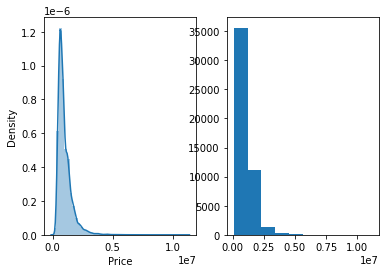

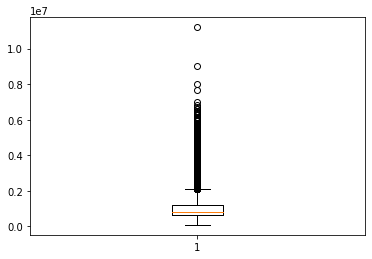

Số lượng outliers:  2272
Tỉ lệ outliers so với mẫu 0.04691016455722338



Propertycount
1\ Describe: 
 count    48433.000000
mean      7566.399913
std       4457.405884
min         39.000000
25%       4280.000000
50%       6567.000000
75%      10412.000000
max      21650.000000
Name: Propertycount, dtype: float64 

2\ Meadian:  6567.0
3\ Mode:  <bound method Series.mode of 0         4019
1         4019
2         4019
3         1543
4         3464
         ...  
48428    17055
48429    14577
48430     5833
48431     5833
48432     5833
Name: Propertycount, Length: 48433, dtype: int64>
4\ Range:  21611
5\ Variance:  19868467.213433728
6\ Số NaN:  0
7\ 	Q1 =  4280.0
   	Q3 =  10412.0
   	IQR =  6132.0
8\ Skew:  0.9516139138867086
Phân phối lệch phải
9\ Kurtosis:  0.6845061020956256
Phân phối nhọn hơn pp chuẩn


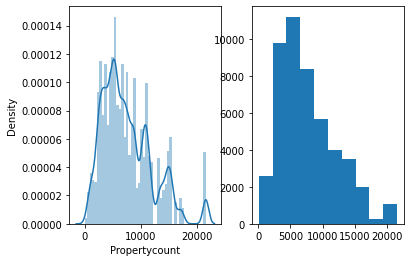

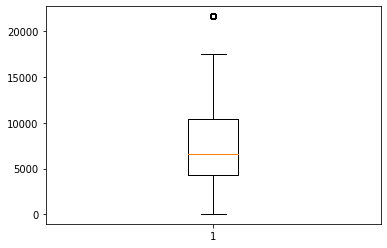

Số lượng outliers:  1067
Tỉ lệ outliers so với mẫu 0.02203043379513968



Distance
1\ Describe: 
 count    48433.000000
mean        12.702761
std          7.550030
min          0.000000
25%          7.000000
50%         11.700000
75%         16.700000
max         55.800000
Name: Distance, dtype: float64 

2\ Meadian:  11.7
3\ Mode:  <bound method Series.mode of 0         3.0
1         3.0
2         3.0
3         7.5
4        10.4
         ... 
48428    38.0
48429     8.4
48430    20.6
48431    20.6
48432    20.6
Name: Distance, Length: 48433, dtype: float64>
4\ Range:  55.8
5\ Variance:  57.002953851155155
6\ Số NaN:  0
7\ 	Q1 =  7.0
   	Q3 =  16.7
   	IQR =  9.7
8\ Skew:  1.1448461993604584
Phân phối lệch phải
9\ Kurtosis:  1.9915315833489524
Phân phối nhọn hơn pp chuẩn


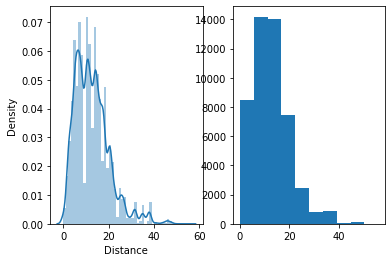

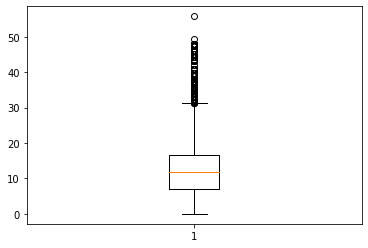

Số lượng outliers:  1522
Tỉ lệ outliers so với mẫu 0.031424854954266716





In [21]:
%matplotlib inline

df_continuous = df_new[['Price', 'Propertycount', 'Distance']]
for i in df_continuous:
    print(i)
    continuous_univariate_analysis(df_new[i])
    visualize_histogram(df_new[i])
    visualize_boxplot(df_new[i])
    find_outliers(df_new[i])
    print("\n====================================================\n\n")

'''
Nhìn chung, các biến liên tục lệch phải, có nhiều outliers
=> cần áp dụng scale để model dc train tốt hơn
'''

### **Categorical Variable**

In [22]:
def categorical_univariate_variable(f):
    print('1\ Số giá trị unique: ', f.nunique())
    print("2\ Mật độ phân phối: \n", f.value_counts())
    print("3\ Số giá trị NaN: \n", f.isnull().sum())
    print("\n\n4\ Tỉ lệ mật độ phân phối:\n", f.value_counts() / len(f))
    f.value_counts().plot.bar()
    plt.show() 

In [23]:
def categorical_multiple_values(f):
    print('1\ Số giá trị unique: ', f.nunique())
    print("2\ Mật độ phân phối: \n", f.value_counts())
    print("3\ Số giá trị NaN: \n", f.isnull().sum())
    print("\n\n4\ Tỉ lệ mật độ phân phối:\n", f.value_counts() / len(f))

Rooms
1\ Số giá trị unique:  14
2\ Mật độ phân phối: 
 3     21812
4     11576
2     10674
5      2350
1      1670
6       283
7        36
8        19
10        6
9         2
12        2
11        1
31        1
16        1
Name: Rooms, dtype: int64
3\ Số giá trị NaN: 
 0


4\ Tỉ lệ mật độ phân phối:
 3     0.450354
4     0.239011
2     0.220387
5     0.048521
1     0.034481
6     0.005843
7     0.000743
8     0.000392
10    0.000124
9     0.000041
12    0.000041
11    0.000021
31    0.000021
16    0.000021
Name: Rooms, dtype: float64


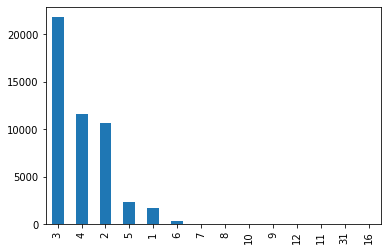




Type
1\ Số giá trị unique:  3
2\ Mật độ phân phối: 
 h    34161
u     9292
t     4980
Name: Type, dtype: int64
3\ Số giá trị NaN: 
 0


4\ Tỉ lệ mật độ phân phối:
 h    0.705325
u    0.191853
t    0.102822
Name: Type, dtype: float64


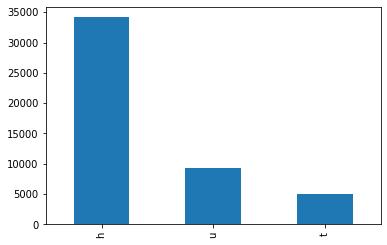




Method
1\ Số giá trị unique:  5
2\ Mật độ phân phối: 
 S     30624
SP     6480
PI     5940
VB     5024
SA      365
Name: Method, dtype: int64
3\ Số giá trị NaN: 
 0


4\ Tỉ lệ mật độ phân phối:
 S     0.632296
SP    0.133793
PI    0.122644
VB    0.103731
SA    0.007536
Name: Method, dtype: float64


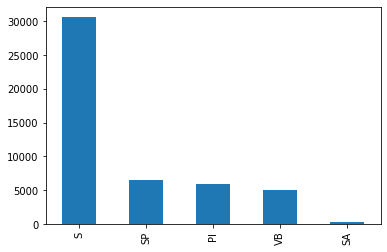




CouncilArea
1\ Số giá trị unique:  34
2\ Mật độ phân phối: 
 Darebin City Council              3462
Boroondara City Council           3455
Banyule City Council              2902
Brimbank City Council             2720
Moreland City Council             2519
Bayside City Council              2495
Monash City Council               2442
Hume City Council                 2373
Glen Eira City Council            2351
Moonee Valley City Council        2163
Whittlesea City Council           2059
Melbourne City Council            2055
Kingston City Council             2025
Maribyrnong City Council          1734
Manningham City Council           1730
Yarra City Council                1320
Whitehorse City Council           1320
Port Phillip City Council         1291
Stonnington City Council          1228
Wyndham City Council              1154
Hobsons Bay City Council          1112
Maroondah City Council            1006
Knox City Council                  750
Frankston City Council             656


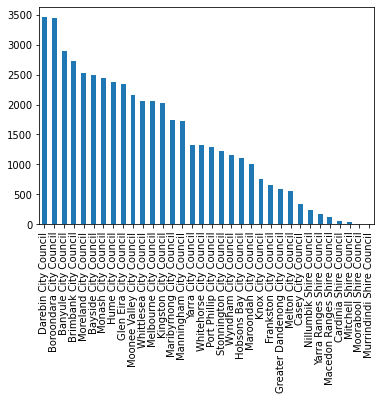




Regionname
1\ Số giá trị unique:  8
2\ Mật độ phân phối: 
 Northern Metropolitan         13598
Southern Metropolitan         12549
Western Metropolitan           9680
Eastern Metropolitan           7585
South-Eastern Metropolitan     4010
Northern Victoria               455
Eastern Victoria                374
Western Victoria                182
Name: Regionname, dtype: int64
3\ Số giá trị NaN: 
 0


4\ Tỉ lệ mật độ phân phối:
 Northern Metropolitan         0.280759
Southern Metropolitan         0.259100
Western Metropolitan          0.199864
Eastern Metropolitan          0.156608
South-Eastern Metropolitan    0.082795
Northern Victoria             0.009394
Eastern Victoria              0.007722
Western Victoria              0.003758
Name: Regionname, dtype: float64


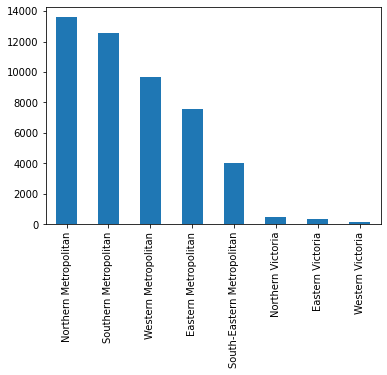

In [24]:
df_cate = df_new[['Rooms', 'Type', 'Method', 'CouncilArea', 'Regionname']]  
for i in df_cate:
    print(i)
    categorical_univariate_variable(df_new[i])
    print("\n====================================================\n\n")


### **Continuous - Continuous**

In [25]:
df_corr = df_continuous.corr()
df_corr

,Price,Propertycount,Distance
Price,1.000000,-0.060769,-0.253668
Propertycount,-0.060769,1.000000,0.007633
Distance,-0.253668,0.007633,1.000000


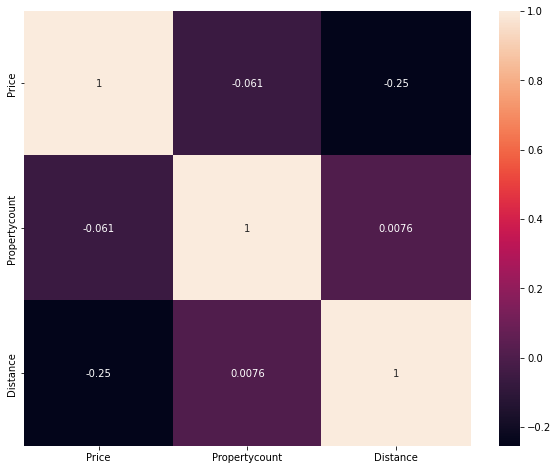

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True)
plt.show()

In [27]:
'''
Nhìn chung thì Propertycount, Distance không ảnh hưởng nhiều đến Price 
'''

'\nNhìn chung thì Propertycount, Distance không ảnh hưởng nhiều đến Price \n'

### **Categorical - Continuous**

In [28]:
cat = ['Rooms', 'Type', 'Method', 'CouncilArea', 'Regionname']
for i in cat:
    model = ols(
         "Price ~ C({f})".format(f=i),
        data=df_new,
    ).fit()
    print(sm.stats.anova_lm(model))
    print('-------------------------------------------------------\n\n')

               df        sum_sq       mean_sq           F  PR(>F)
C(Rooms)     13.0  3.032765e+15  2.332896e+14  805.280737     0.0
Residual  48419.0  1.402697e+16  2.896997e+11         NaN     NaN
-------------------------------------------------------


               df        sum_sq       mean_sq            F  PR(>F)
C(Type)       2.0  1.728221e+15  8.641107e+14  2729.598918     0.0
Residual  48430.0  1.533151e+16  3.165706e+11          NaN     NaN
-------------------------------------------------------


                df        sum_sq       mean_sq           F         PR(>F)
C(Method)      4.0  3.569357e+14  8.923394e+13  258.724365  2.227976e-220
Residual   48428.0  1.670280e+16  3.448996e+11         NaN            NaN
-------------------------------------------------------


                     df        sum_sq       mean_sq           F  PR(>F)
C(CouncilArea)     33.0  4.443240e+15  1.346436e+14  516.515625     0.0
Residual        48399.0  1.261649e+16  2.606768e+11         N

'''
Các giá trị PR(>F) đều > 0.05 (khoảng chấp nhận của em), => các biến trên đều có ảnh hưởng đến Price
'''

### **Feature Enginerring**

In [29]:
df_new = df_new.drop_duplicates()

In [30]:
df_new.head()

,Rooms,Type,Price,Method,Regionname,Propertycount,Distance,CouncilArea
0,3,h,1490000.0,S,Northern Metropolitan,4019,3.0,Yarra City Council
1,3,h,1220000.0,S,Northern Metropolitan,4019,3.0,Yarra City Council
2,3,h,1420000.0,S,Northern Metropolitan,4019,3.0,Yarra City Council
3,3,h,1515000.0,S,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,2,h,670000.0,S,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [31]:
df_train = df_new.copy()
df_train.head(5)

,Rooms,Type,Price,Method,Regionname,Propertycount,Distance,CouncilArea
0,3,h,1490000.0,S,Northern Metropolitan,4019,3.0,Yarra City Council
1,3,h,1220000.0,S,Northern Metropolitan,4019,3.0,Yarra City Council
2,3,h,1420000.0,S,Northern Metropolitan,4019,3.0,Yarra City Council
3,3,h,1515000.0,S,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,2,h,670000.0,S,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [75]:
df2 = df.copy()

In [76]:
df2 = df2.drop(columns={'Date', 'SellerG', 'Postcode', 'Suburb', 'Address'})

In [77]:
df_new2 = pd.get_dummies(df2, prefix=['Type', 'Method', 'CouncilArea', 'Regionname'])

In [78]:
df_train = df_new2[~df_new2.Price.isnull()].reset_index(drop=True)
df_prediction = df_new2[df_new2.Price.isnull()].reset_index(drop=True)

In [32]:
# df_train = pd.get_dummies(df_train, prefix=['Type', 'Method', 'CouncilArea', 'Regionname'])

In [79]:
df_train.head(2)

,Rooms,Price,Propertycount,Distance,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,...,Regionname_Moreland City Council,Regionname_Murrindindi Shire Council,Regionname_Nillumbik Shire Council,Regionname_Port Phillip City Council,Regionname_Stonnington City Council,Regionname_Whitehorse City Council,Regionname_Whittlesea City Council,Regionname_Wyndham City Council,Regionname_Yarra City Council,Regionname_Yarra Ranges Shire Council
0,3,1490000.0,4019,3.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,3,1220000.0,4019,3.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [80]:
# from scipy.stats import itemfreq
# itemfreq(df.Suburb)

In [81]:
# X = df_new.drop(columns={'Price'}).values # input
# y = df_new[['Price']].values # output

X = df_train.drop(columns={'Price'}).values # input
y = df_train[['Price']].values # output

In [82]:
sc_X = StandardScaler()
sc_X.fit(X)  #[['Rooms', 'Price', 'Propertycount', 'Distance']]
X = sc_X.transform(X)

# df_train_new.head()

In [83]:
sc_y = StandardScaler().fit(y)
y = sc_y.transform(y)

In [84]:
X[:2]

array([[-7.58612874e-02, -7.95852258e-01, -1.28514199e+00,
         6.46363957e-01, -3.38535946e-01, -4.87235184e-01,
        -3.73881973e-01,  0.00000000e+00,  7.62585967e-01,
        -8.71401706e-02,  0.00000000e+00, -3.93012164e-01,
         0.00000000e+00, -3.40200482e-01,  0.00000000e+00,
        -4.30915776e-01, -8.82162183e-02,  1.60055421e+00,
        -9.73833316e-02, -3.00447258e-01, -5.91362983e-01,
        -4.99787068e-01, -6.14161424e-02, -2.52461472e-01,
        -2.33050068e-01, -2.77155790e-01, -2.43929649e-01,
        -3.27841744e-02, -8.44538926e-02, -2.77458005e-01,
        -1.17177029e-01, -2.25871094e-01, -1.11619780e-01,
        -1.53294099e-01, -2.26979640e-01, -2.08889249e-01,
        -1.25414816e-01, -4.85728355e-02, -1.92464512e-01,
        -1.92695138e-01, -1.45641842e-01, -2.10498936e-01,
        -1.07371231e-01, -2.44770104e-02, -2.30428612e-01,
        -2.16211361e-01, -1.50721421e-02, -2.34229461e-01,
        -4.54395266e-03, -7.02728369e-02, -1.65485185e-0

In [85]:
y[:5]

array([[ 0.82916215],
       [ 0.37422823],
       [ 0.71121632],
       [ 0.87128566],
       [-0.552489  ]])

#### **Train_Test_Split**

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [87]:
X_train.shape

(36324, 57)

In [94]:
58/2

29.0

In [95]:
model = keras.Sequential()
# add first layer and first hidden layer
model.add(layers.Dense(units=29, activation="relu", input_shape=(57,))) 
model.add(layers.BatchNormalization())

model.add(layers.Dropout(0.2))

# add second hidden layer
model.add(layers.Dense(29, activation="relu"))

model.add(layers.Dropout(0.2))

# add output layer
model.add(layers.Dense(units = 1, activation='relu'))

# compiling ANN
model.compile(optimizer="adam", loss="mse", metrics=['mae'])



In [96]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 29)                1682      
                                                                 
 batch_normalization_1 (Batc  (None, 29)               116       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 29)                0         
                                                                 
 dense_4 (Dense)             (None, 29)                870       
                                                                 
 dropout_3 (Dropout)         (None, 29)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 30        
                                                      

In [97]:
early_stopping = EarlyStopping(
    min_delta = 0.0001,
    patience=20, 
    restore_best_weights = True
)

In [102]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=200,
    epochs=200,
    callbacks=[early_stopping],
    verbose=1 
)


Epoch 1/200
182/182 [==============================] - 1s 3ms/step - loss: 0.5072 - mae: 0.5582 - val_loss: 0.4971 - val_mae: 0.5526
Epoch 2/200
182/182 [==============================] - 1s 3ms/step - loss: 0.5052 - mae: 0.5583 - val_loss: 0.4960 - val_mae: 0.5518
Epoch 3/200
182/182 [==============================] - 1s 3ms/step - loss: 0.5038 - mae: 0.5574 - val_loss: 0.4951 - val_mae: 0.5517
Epoch 4/200
182/182 [==============================] - 1s 3ms/step - loss: 0.5052 - mae: 0.5581 - val_loss: 0.4955 - val_mae: 0.5539
Epoch 5/200
182/182 [==============================] - 1s 3ms/step - loss: 0.5054 - mae: 0.5576 - val_loss: 0.4950 - val_mae: 0.5534
Epoch 6/200
182/182 [==============================] - 1s 3ms/step - loss: 0.5064 - mae: 0.5580 - val_loss: 0.4941 - val_mae: 0.5531
Epoch 7/200
182/182 [==============================] - 1s 3ms/step - loss: 0.5039 - mae: 0.5574 - val_loss: 0.4931 - val_mae: 0.5505
Epoch 8/200
182/182 [==============================] - 1s 3ms/step - 

In [103]:
df_history = pd.DataFrame(history.history)
df_history.tail()

,loss,mae,val_loss,val_mae
52,0.500001,0.556658,0.492623,0.550520
53,0.502992,0.557425,0.491070,0.549748
54,0.500536,0.556279,0.493287,0.553318
55,0.504436,0.557178,0.492565,0.549808
56,0.502345,0.556507,0.492916,0.549643


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


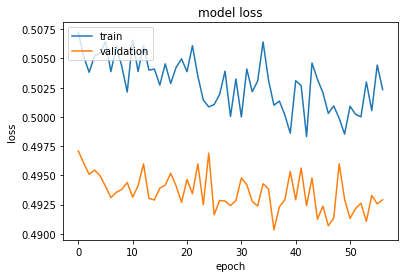

In [104]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [105]:
# evaluate the model
scores = model.evaluate(X_train, y_train)
print(scores)

1136/1136 [==============================] - 2s 2ms/step - loss: 0.4826 - mae: 0.5449
[0.482646644115448, 0.5448991060256958]


loss của train và test đều thấp, ko xảy ra hiện tượng overfitting
=> model có thể sử dụng

### **Lưu model**

In [106]:
model.save('LDS8_K275_DinhVietTrung_Cuoi_ky/model/ANN_price.h5')

In [107]:
model_new = keras.models.load_model('LDS8_K275_DinhVietTrung_Cuoi_ky/model/ANN_price.h5')

### **Prediction**

In [110]:
df_prediction.iloc[:5, :]

,Rooms,Price,Propertycount,Distance,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,...,Regionname_Moreland City Council,Regionname_Murrindindi Shire Council,Regionname_Nillumbik Shire Council,Regionname_Port Phillip City Council,Regionname_Stonnington City Council,Regionname_Whitehorse City Council,Regionname_Whittlesea City Council,Regionname_Wyndham City Council,Regionname_Yarra City Council,Regionname_Yarra Ranges Shire Council
0,6,NaN,1899,14.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,NaN,7630,15.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,NaN,3052,10.2,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,NaN,1130,16.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,NaN,7809,9.7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
df_prediction_new = df_prediction.drop(columns={'Price'})


In [114]:
df_prediction_new.columns

Index(['Rooms', 'Propertycount', 'Distance', 'Type_h', 'Type_t', 'Type_u',
       'Method_PI', 'Method_PN', 'Method_S', 'Method_SA', 'Method_SN',
       'Method_SP', 'Method_SS', 'Method_VB', 'Method_W',
       'CouncilArea_Eastern Metropolitan', 'CouncilArea_Eastern Victoria',
       'CouncilArea_Northern Metropolitan', 'CouncilArea_Northern Victoria',
       'CouncilArea_South-Eastern Metropolitan',
       'CouncilArea_Southern Metropolitan', 'CouncilArea_Western Metropolitan',
       'CouncilArea_Western Victoria', 'Regionname_Banyule City Council',
       'Regionname_Bayside City Council', 'Regionname_Boroondara City Council',
       'Regionname_Brimbank City Council', 'Regionname_Cardinia Shire Council',
       'Regionname_Casey City Council', 'Regionname_Darebin City Council',
       'Regionname_Frankston City Council',
       'Regionname_Glen Eira City Council',
       'Regionname_Greater Dandenong City Council',
       'Regionname_Hobsons Bay City Council', 'Regionname_Hume Cit

In [123]:
X_new = df_prediction_new.to_numpy()

In [124]:
X_new = sc_X.fit_transform(X_new)

In [125]:
X_train.shape

(36324, 57)

In [126]:
X_new.shape

(14590, 57)

In [128]:
y_new = model_new.predict(X_new)

In [129]:
y_new = sc_y.inverse_transform(y_new)

In [130]:
y_new

array([[ 997898.25],
       [ 997898.25],
       [1877011.1 ],
       ...,
       [1280849.6 ],
       [ 997898.25],
       [ 997898.25]], dtype=float32)

#### **Đưa ra dự đoán cho phần data bị null ở cột price trong dataset ban đầu**

In [150]:
df_prediction_new =  df[df.Price.isnull()].reset_index(drop=True)

In [151]:
df_prediction_new

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Albanvale,1 Jackson Cct,6,h,NaN,PI,hockingstuart,1/04/2017,3021,Western Metropolitan,1899,14.0,Brimbank City Council
1,Altona Meadows,57 Tatman Dr,4,h,NaN,SN,Barry,1/04/2017,3028,Western Metropolitan,7630,15.5,Hobsons Bay City Council
2,Ashburton,1 Pitt St,4,h,NaN,S,Jellis,1/04/2017,3147,Southern Metropolitan,3052,10.2,Boroondara City Council
3,Attwood,46 Threadneedle St,4,h,NaN,SN,Barry,1/04/2017,3049,Northern Metropolitan,1130,16.5,Hume City Council
4,Balwyn North,12 Agnes Av,3,h,NaN,SP,Fletchers,1/04/2017,3104,Southern Metropolitan,7809,9.7,Boroondara City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14585,Wyndham Vale,15 Yaltara Dr,3,h,NaN,S,hockingstuart,30/12/2017,3024,Western Metropolitan,5262,27.2,Wyndham City Council
14586,Yarraville,4/247 Williamstown Rd,3,t,NaN,S,Jas,30/12/2017,3013,Western Metropolitan,6543,6.3,Maribyrnong City Council
14587,Burwood,29 Summit Rd,4,h,NaN,PN,@Realty,31/03/2018,3125,Southern Metropolitan,5678,10.4,Monash City Council
14588,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [152]:
y_new.shape

(14590, 1)

In [169]:
y_new_1dim = y_new.reshape((1, len(y_new)))[0]
y_new_1dim

array([ 997898.25,  997898.25, 1877011.1 , ..., 1280849.6 ,  997898.25,
        997898.25], dtype=float32)

In [170]:
df_prediction_new.Price = y_new_1dim

In [171]:
df_prediction_new

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Albanvale,1 Jackson Cct,6,h,997898.250,PI,hockingstuart,1/04/2017,3021,Western Metropolitan,1899,14.0,Brimbank City Council
1,Altona Meadows,57 Tatman Dr,4,h,997898.250,SN,Barry,1/04/2017,3028,Western Metropolitan,7630,15.5,Hobsons Bay City Council
2,Ashburton,1 Pitt St,4,h,1877011.125,S,Jellis,1/04/2017,3147,Southern Metropolitan,3052,10.2,Boroondara City Council
3,Attwood,46 Threadneedle St,4,h,997898.250,SN,Barry,1/04/2017,3049,Northern Metropolitan,1130,16.5,Hume City Council
4,Balwyn North,12 Agnes Av,3,h,1541321.875,SP,Fletchers,1/04/2017,3104,Southern Metropolitan,7809,9.7,Boroondara City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14585,Wyndham Vale,15 Yaltara Dr,3,h,997898.250,S,hockingstuart,30/12/2017,3024,Western Metropolitan,5262,27.2,Wyndham City Council
14586,Yarraville,4/247 Williamstown Rd,3,t,997898.250,S,Jas,30/12/2017,3013,Western Metropolitan,6543,6.3,Maribyrnong City Council
14587,Burwood,29 Summit Rd,4,h,1280849.625,PN,@Realty,31/03/2018,3125,Southern Metropolitan,5678,10.4,Monash City Council
14588,Thomastown,3/1 Travers St,3,u,997898.250,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council
